In [1]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 26.9 MB/s eta 0:00:00


## Import Libraries

In [2]:
import zipfile
import os
import cv2
import wandb

# Login to Weights & Biases
wandb.login(key='0fa191375b7b521942eb19d43936101e848f67de')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ultralytics import YOLO
from IPython.display import Video

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Explore images!

In [3]:
images=[]
dirpath='/kaggle/input/cardetection/car/train/images'
def show_samples():
    for file in os.listdir(dirpath):
      filepath=os.path.join(dirpath,file)
      images.append(filepath)
    fig,ax=plt.subplots(5,4,figsize=(10,10))

    for i in range(20):
        index=np.random.randint(0,len(images))
        plt.subplot(5, 4, i + 1)
        img = cv2.imread(images[index])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
        plt.imshow(img)
        plt.axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

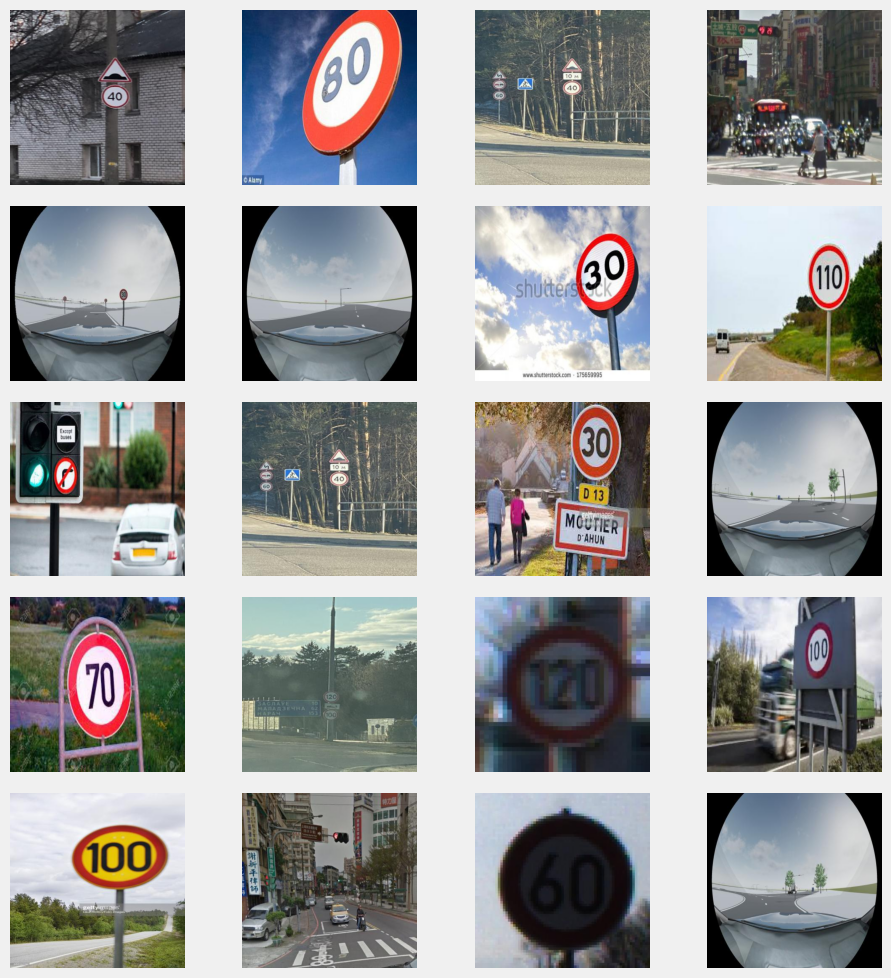

In [4]:
show_samples()

## Train using Yolo8

In [5]:
model=YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 251MB/s]


In [6]:
# Define dataset paths
data_dir = '/kaggle/input/cardetection/car'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Define class names
class_names = [
    'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110',
    'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50',
    'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'
]

# Prepare the dataset.yaml file for YOLOv8
dataset_yaml = f"""
path: {data_dir}
train: {train_dir}
val: {val_dir}
test: {test_dir}

names:
{os.linesep.join([f'  {i}: {name}' for i, name in enumerate(class_names)])}
"""

# Save the dataset.yaml file
with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

In [7]:
model.train(data='dataset.yaml',epochs=100, imgsz = 512, batch = 32 ,lr0=0.0001, dropout= 0.15, device = 0)

Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 39.5MB/s]
2024-08-10 09:24:54,212	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-10 09:24:54,979	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

wandb: Currently logged in as: mannar324 (mannar324-assuit). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.17.4
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240810_092507-vk83esp8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/mannar324-assuit/YOLOv8
wandb: 🚀 View run at https://wandb.ai/mannar324-assuit/YOLOv8/runs/vk83esp8


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 158MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:16<00:00, 210.62it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 228.09it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.2G     0.8202      2.519      1.115         19        512: 100%|██████████| 111/111 [02:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]

                   all        801        944      0.281      0.525      0.281      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        13G     0.8072      1.768      1.079         13        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.301      0.374      0.343      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.2G     0.8054      1.603      1.075         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.513      0.397      0.381      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        13G     0.7893      1.515      1.066         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.543      0.466      0.496       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.2G     0.7482      1.339      1.046         28        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.505      0.576      0.555      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        13G     0.7209       1.22      1.035         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.703      0.671      0.723      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.2G     0.7037      1.115      1.019         13        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

                   all        801        944      0.739      0.673      0.731      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        13G     0.6838      1.063      1.012         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.859      0.737      0.838      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.2G     0.6774     0.9713      1.005         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.834      0.782      0.848      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        13G     0.6505     0.9313     0.9994         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.848      0.794      0.869      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.2G     0.6448     0.8881     0.9875         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.877      0.822      0.875      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        13G     0.6444     0.8707     0.9965         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.892      0.801      0.887      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.2G     0.6393     0.8242      0.989         29        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.862      0.786      0.869      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        13G     0.6224     0.8119     0.9867         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.922      0.858      0.914      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.2G     0.6192     0.7706     0.9855         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.924      0.812      0.901      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        13G     0.6202     0.7872     0.9807         11        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.935      0.835      0.915       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.2G     0.6144     0.7553     0.9783         13        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.943      0.842      0.915      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        13G     0.5955     0.7405     0.9697         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.926      0.847       0.92      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.2G     0.6087     0.7357     0.9747         25        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.952      0.836      0.929      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        13G     0.6046     0.7248     0.9707         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.943      0.832      0.912      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.2G     0.5935     0.7087     0.9677         13        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.947      0.864      0.935      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        13G     0.5743     0.6881     0.9655         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944       0.93      0.853      0.924      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.2G     0.5901     0.6847     0.9664         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.942       0.86      0.938      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        13G      0.574     0.6868     0.9655         31        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.949      0.859      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.2G     0.5719     0.6507     0.9603         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.938      0.856      0.931      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        13G     0.5604     0.6358     0.9518         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.955      0.877      0.942      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.2G     0.5689     0.6508     0.9517         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.949      0.872      0.937      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        13G     0.5665      0.643     0.9574         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.924      0.909      0.942       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.2G     0.5594     0.6288     0.9503         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.935      0.896      0.942      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        13G     0.5552     0.6204     0.9493         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.939      0.881      0.942      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.3G     0.5517     0.6081     0.9536         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.942      0.885      0.945      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        13G     0.5478     0.6069     0.9529         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.954      0.903      0.949      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.2G     0.5439      0.593     0.9545         29        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.949      0.883      0.945      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        13G     0.5435     0.5824     0.9415         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.913      0.907      0.944      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.2G     0.5419      0.585     0.9498         26        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.951      0.862      0.942      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        13G     0.5441     0.5977     0.9469         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.959      0.884      0.952      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.2G     0.5312     0.5673     0.9428         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.947      0.882      0.941      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        13G     0.5338     0.5694     0.9518         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.953      0.903      0.954      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.2G      0.533     0.5788     0.9427         15        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.953      0.889      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        13G     0.5291     0.5702     0.9426         14        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.948      0.903      0.956      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.2G     0.5186     0.5667     0.9371         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.959      0.897      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        13G     0.5296     0.5501     0.9383         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.931      0.913      0.951      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.2G     0.5205      0.563     0.9416         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.95      0.901      0.949      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        13G     0.5131     0.5453     0.9387         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.951      0.895      0.951      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.2G     0.5163     0.5453     0.9366         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944       0.95      0.894      0.953      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        13G     0.5134     0.5459     0.9383         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.959      0.879      0.949      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.2G     0.5265      0.529     0.9331         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.943      0.918      0.955      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        13G     0.5088     0.5212     0.9316         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.941      0.912       0.95      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.2G     0.5155     0.5319     0.9383         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944       0.95      0.907      0.956      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        13G     0.5039     0.5087     0.9304         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.966      0.902      0.956      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.2G     0.5002     0.5166     0.9289         21        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.955      0.902      0.956      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        13G     0.5005     0.5009     0.9284         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.965      0.903      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.2G     0.4937     0.5116     0.9266         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.951      0.895      0.955      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        13G     0.4985     0.4969      0.928         21        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.934      0.932      0.959      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.2G     0.4923     0.5052     0.9299         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.945      0.926      0.958       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        13G     0.4878     0.4904     0.9255         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.943      0.926      0.962      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.2G     0.4884     0.4961     0.9269         12        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.945       0.92       0.96      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        13G     0.4845     0.4861      0.925         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.954      0.918      0.959      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.2G     0.4865     0.4832     0.9263         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.945      0.924      0.959      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        13G     0.4809     0.4783      0.924         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.919       0.93      0.958      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.3G     0.4764      0.477     0.9218         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

                   all        801        944      0.955      0.911      0.961      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        13G     0.4842     0.4821     0.9217         15        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.94      0.928      0.961      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.2G     0.4757     0.4752     0.9223         26        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.907      0.926      0.955      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        13G     0.4725     0.4654     0.9192         32        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.945      0.924      0.964      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.2G     0.4679     0.4582     0.9207         23        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.962      0.909      0.962      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        13G     0.4706     0.4611     0.9181         16        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.95      0.922      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.2G      0.465     0.4549     0.9184         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.944       0.92      0.958      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        13G     0.4643      0.451     0.9208         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.934      0.936       0.96      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.2G     0.4618     0.4492     0.9182         24        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.923      0.931      0.958      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        13G     0.4598     0.4432     0.9161         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.965      0.913      0.962      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.2G     0.4673     0.4472      0.915         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.949      0.922      0.962      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        13G       0.45     0.4348     0.9151         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944       0.94      0.935      0.962      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.2G     0.4419     0.4223     0.9154         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.959      0.918      0.964       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        13G     0.4459     0.4304     0.9124         30        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.954      0.935      0.965       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.2G     0.4482     0.4294     0.9163         19        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.941      0.945      0.965      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        13G     0.4469     0.4308     0.9103         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.954      0.938      0.967      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.2G     0.4489      0.431     0.9164         21        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.95      0.939      0.964      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        13G     0.4344      0.416     0.9091         28        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.95      0.939      0.965      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.2G     0.4362     0.4116     0.9066         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.949       0.93       0.96      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        13G     0.4361     0.4157     0.9085         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.947      0.935      0.964      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.2G     0.4244     0.4035     0.9059         21        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.953      0.931      0.964      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        13G     0.4265     0.3986     0.9036         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.947      0.937      0.963      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.2G     0.4285     0.4045     0.9071         25        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.946      0.935      0.964      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        13G     0.4223     0.3991     0.9051         22        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.954      0.934      0.967      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.2G     0.4196     0.3898     0.9046         17        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.947      0.929      0.964      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        13G     0.4203     0.3919     0.9061         18        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.953      0.943      0.967      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.2G     0.4109     0.3803      0.901         12        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.958       0.94      0.968      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        13G     0.4217     0.3944      0.901         27        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.971      0.933      0.966      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.2G      0.405     0.3722     0.8993         20        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.958       0.94      0.963      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        13G     0.4132     0.3862     0.8999         21        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.963      0.936      0.967      0.852


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.2G     0.4005     0.2279     0.8597         12        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.957      0.936      0.964      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        13G     0.3952     0.2234     0.8518         12        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.961      0.932      0.962      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.2G     0.3938     0.2225     0.8476         12        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944       0.96      0.932      0.963      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        13G     0.3869     0.2161      0.845         14        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.956      0.934      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.2G     0.3834     0.2128     0.8464         10        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.954      0.937      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        13G     0.3761     0.2111     0.8439         13        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.947      0.942      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.2G     0.3749     0.2072     0.8441         12        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.952      0.938      0.964      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        13G     0.3662     0.2033     0.8438         10        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.949       0.94      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.2G     0.3709     0.2056     0.8425         11        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.957      0.936      0.965       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        13G     0.3683     0.2029      0.843         11        512: 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]

                   all        801        944      0.948       0.94      0.965      0.852



100 epochs completed in 3.683 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,173 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]


                   all        801        944      0.958       0.94      0.967      0.851
           Green Light         87        122      0.882      0.798      0.866      0.563
             Red Light         74        108      0.824      0.739        0.8      0.507
       Speed Limit 100         52         52      0.982          1      0.995      0.911
       Speed Limit 110         17         17      0.977          1      0.995      0.937
       Speed Limit 120         60         60      0.974          1      0.995      0.933
        Speed Limit 20         56         56      0.982      0.963      0.987      0.876
        Speed Limit 30         71         74      0.961      0.987      0.994      0.926
        Speed Limit 40         53         55      0.938      0.982      0.987      0.891
        Speed Limit 50         68         71          1      0.961       0.99      0.894
        Speed Limit 60         76         76      0.986      0.948      0.982      0.901
        Speed Limit 7

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▂▆▇▇▇▇█████████████████████████████████
wandb:     metrics/mAP50-95(B) ▁▂▅▆▇▇▇▇▇▇▇█████████████████████████████
wandb:    metrics/precision(B) ▁▃▅▇▇▇██████████████████████████████████
wandb:       metrics/recall(B) ▃▁▅▅▆▆▇▇▇▇▇█▇█▇▇▇▇▇█████████████████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▆▆▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/dfl_loss █▇▆▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▁▁▁▁
wandb:            val/box_loss █▅▄▃▂▃▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f623c77dff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

## Evaluate The Model

In [8]:
def display_images(training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

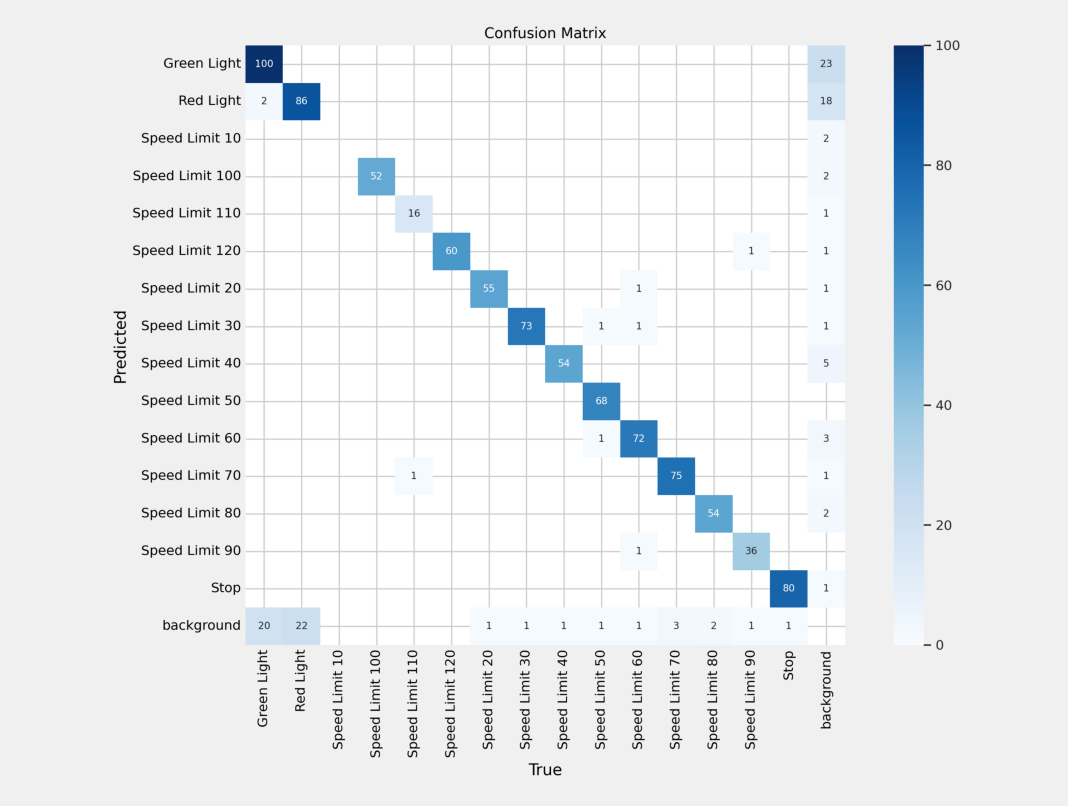

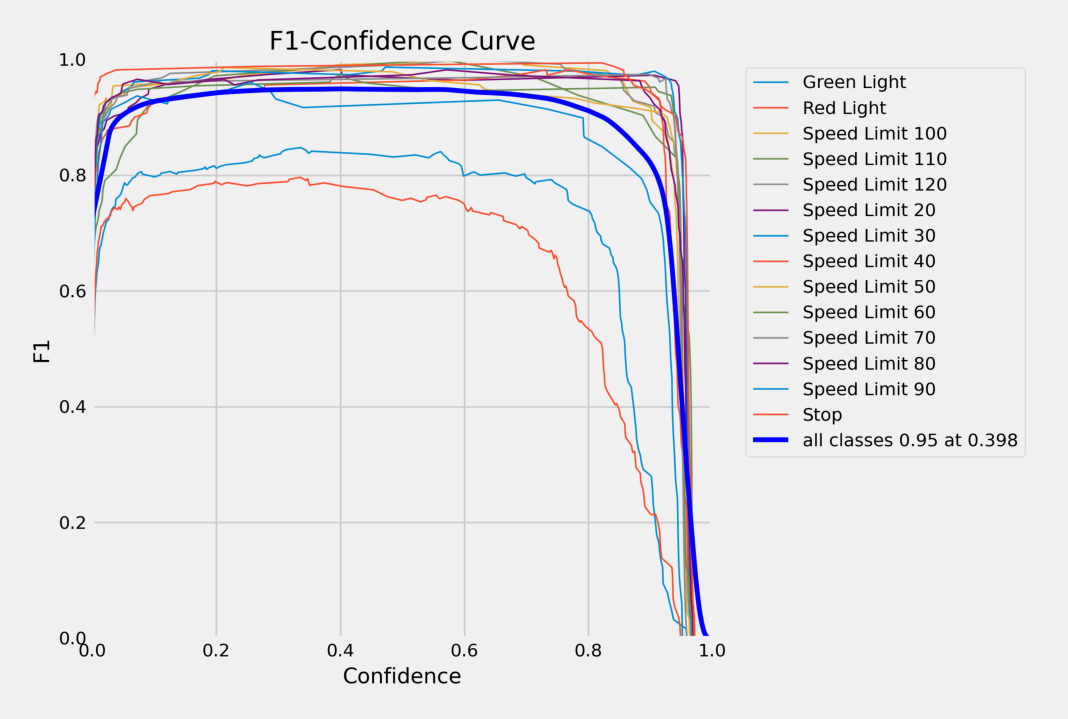

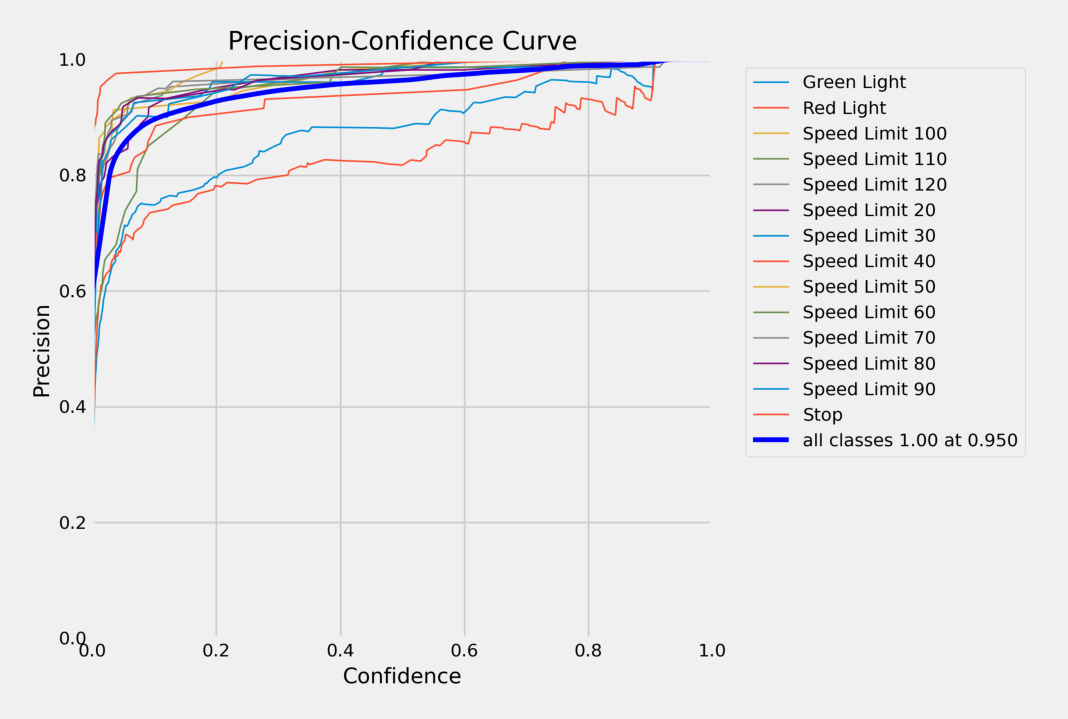

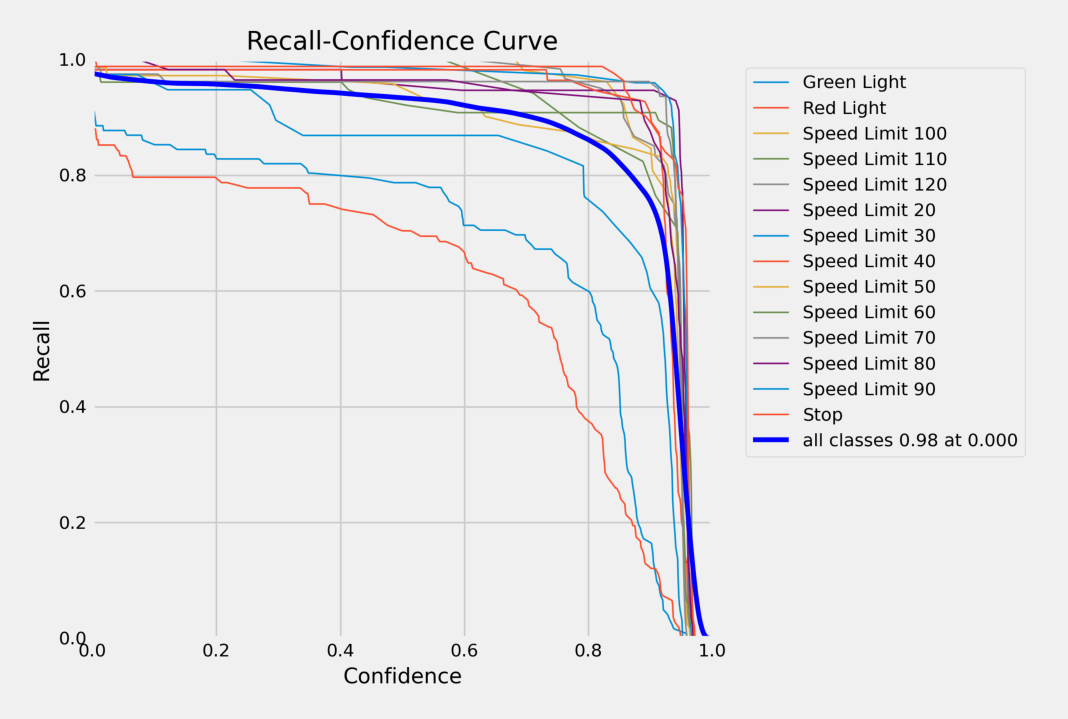

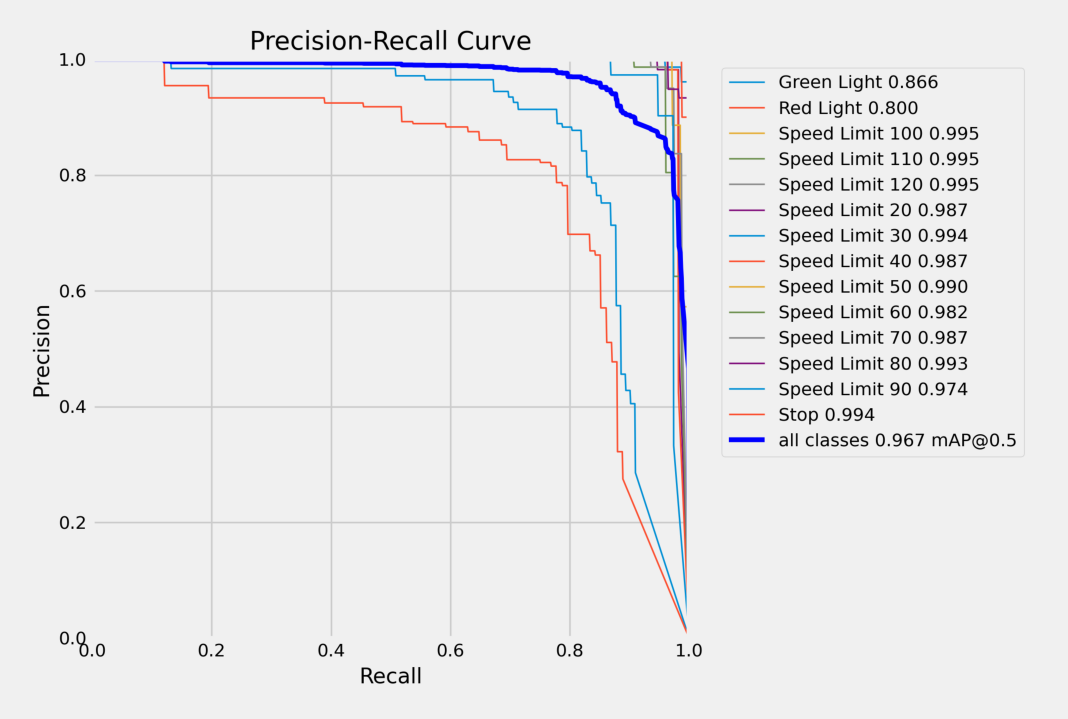

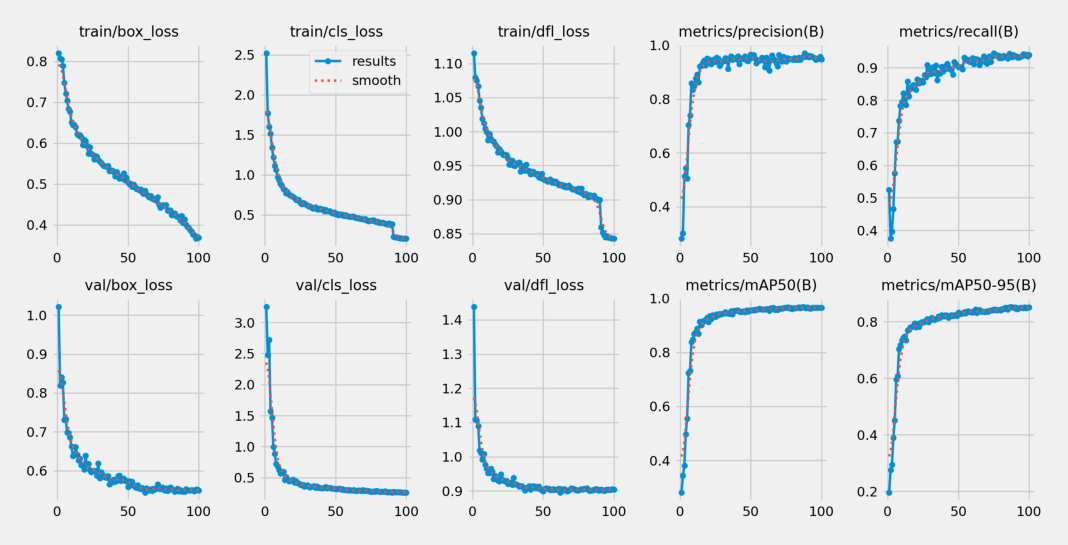

In [9]:
image_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [10]:
Result_Final_model=pd.read_csv('/kaggle/working/runs/detect/train/results.csv')

In [11]:
Result_Final_model.tail()

epoch        train/box_loss        train/cls_loss  \
95                    96               0.37606               0.21111   
96                    97               0.37489               0.20725   
97                    98               0.36618               0.20333   
98                    99               0.37091               0.20563   
99                   100               0.36831               0.20293   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
95               0.84392               0.94716               0.94228   
96               0.84411               0.95161               0.93841   
97               0.84378               0.94911               0.94044   
98               0.84254               0.95713               0.93576   
99               0.84299               0.94806               0.94004   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
95               0.96507               0.84878               0.54920   
96               0.96443               0.85178               0.54744   
97               0.96468               0.84879               0.55148   
98               0.96502               0.84959               0.55136   
99               0.96539               0.85173               0.54960   

            val/cls_loss          val/dfl_loss                lr/pg0  \
95               0.26583               0.90451              0.000031   
96               0.26294               0.90310              0.000026   
97               0.26381               0.90407              0.000021   
98               0.26373               0.90566              0.000016   
99               0.26223               0.90419              0.000010   

                  lr/pg1                lr/pg2  
95              0.000031              0.000031  
96              0.000026              0.000026  
97              0.000021              0.000021  
98              0.000016              0.000016  
99              0.000010              0.000010

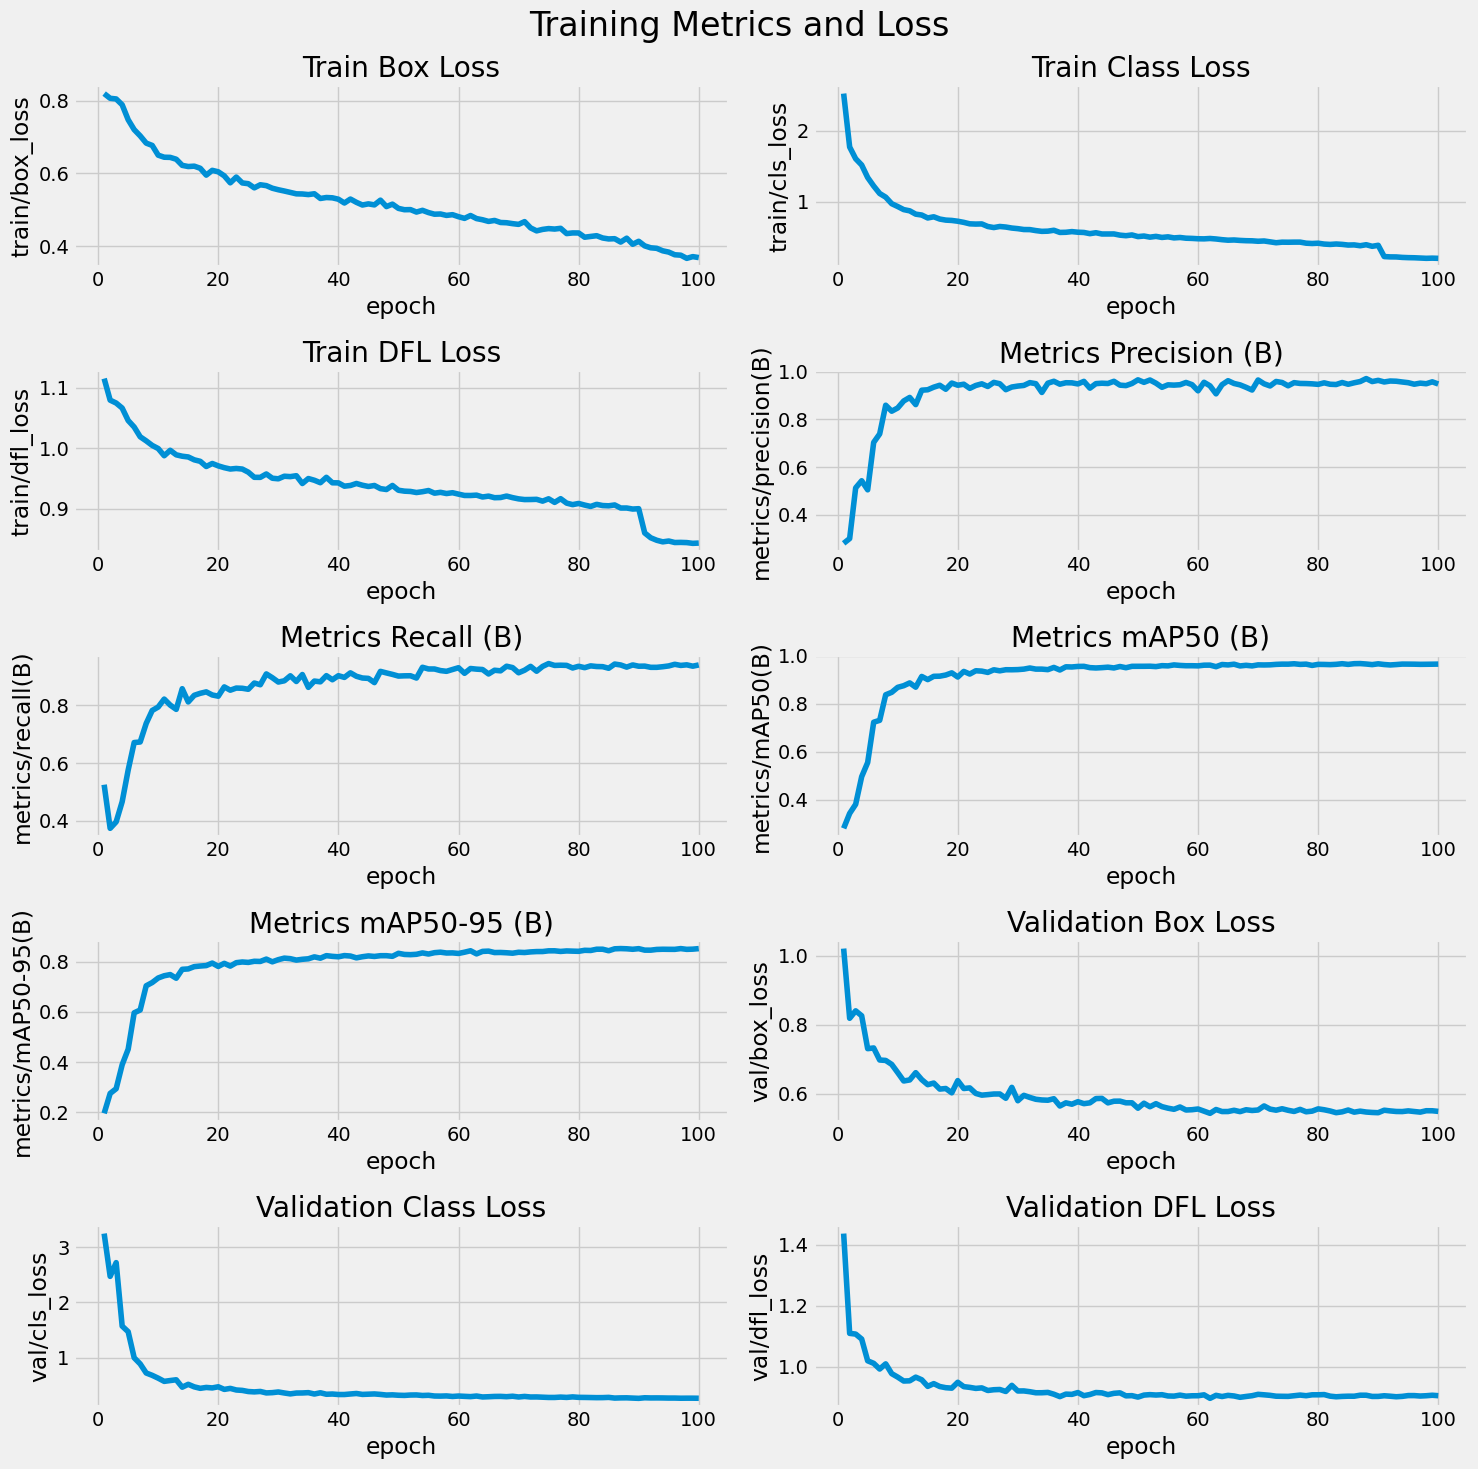

In [12]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## Validation using Test data

In [13]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')
results=pd.DataFrame(columns=["metrics/precision(B)","metrics/recall(B)","metrics/mAP50(B)","metrics/mAP50-95(B)"])
precision = metrics.results_dict["metrics/precision(B)"]
recall =  metrics.results_dict["metrics/recall(B)"]
map50 = metrics.results_dict["metrics/mAP50(B)"]
map50_95 = metrics.results_dict["metrics/mAP50-95(B)"]
results.loc[0]=[precision,recall,map50,map50_95]
results
# print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
# print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
# print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
# print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,173 parameters, 0 gradients, 164.9 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 961.39it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:15<00:00,  3.31it/s]


                   all        801        944      0.954      0.945      0.967      0.852
           Green Light         87        122      0.883      0.803      0.864      0.559
             Red Light         74        108      0.821       0.75      0.805      0.514
       Speed Limit 100         52         52      0.971          1      0.995      0.911
       Speed Limit 110         17         17      0.969          1      0.995      0.937
       Speed Limit 120         60         60      0.969          1      0.995      0.935
        Speed Limit 20         56         56      0.976      0.982      0.987       0.87
        Speed Limit 30         71         74      0.961       0.99      0.994      0.927
        Speed Limit 40         53         55      0.935      0.982      0.987       0.89
        Speed Limit 50         68         71          1      0.964       0.99      0.894
        Speed Limit 60         76         76      0.972      0.974      0.984      0.905
        Speed Limit 7

metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0              0.954172           0.944741          0.967345   

   metrics/mAP50-95(B)  
0             0.851662


image 1/1 /kaggle/input/cardetection/car/test/images/000664_jpg.rf.882fdd90b90c7f1af1fc37a7467443cf.jpg: 416x416 1 Speed Limit 50, 1 Speed Limit 80, 17.2ms
Speed: 1.5ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/car/test/images/000822_jpg.rf.63b8e6ec737487b4e7e9e2ed48754226.jpg: 416x416 1 Speed Limit 90, 17.2ms
Speed: 1.3ms preprocess, 17.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/car/test/images/001051_jpg.rf.bb8152d7d7c35ed73bfc9239185f9087.jpg: 416x416 2 Speed Limit 100s, 1 Speed Limit 120, 1 Speed Limit 80, 17.1ms
Speed: 0.7ms preprocess, 17.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/car/test/images/00014_00023_00018_png.rf.7f4df748842e9a2b90d343c5612ff812.jpg: 416x416 1 Stop, 17.1ms
Speed: 0.9ms preprocess, 17.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416

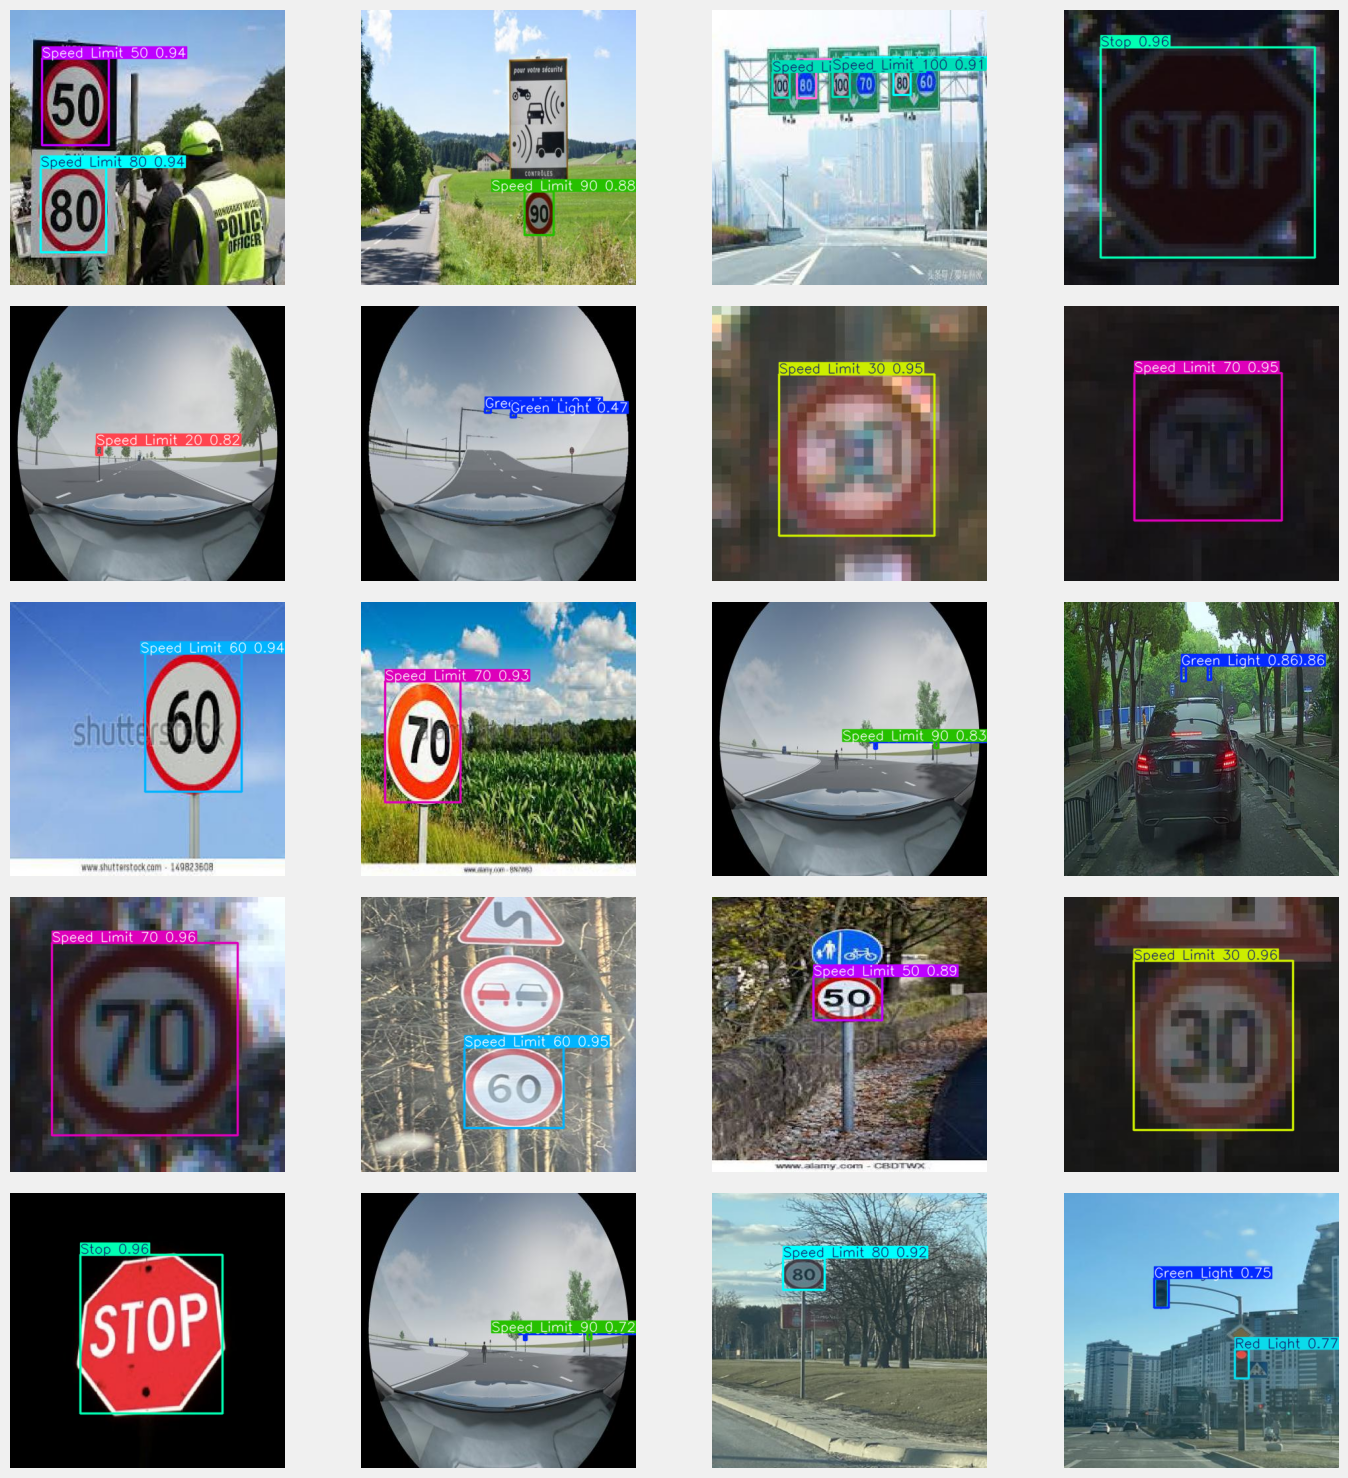

In [14]:
data_dir = '/kaggle/input/cardetection/car/test'
test_dir = os.path.join(data_dir, 'images')
images=os.listdir(test_dir)
# show results
images = images[:20]

# Show results
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
for i, image_name in enumerate(images):
    image_path = os.path.join(test_dir, image_name)
    result_predict = Valid_model.predict(source=image_path, imgsz=(416))
    plot = result_predict[0].plot()
    
    plt.subplot(5, 4, i + 1)
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    plt.imshow(plot)
    plt.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()

## Try The Model on Video

In [15]:
best_model=YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
video_path = '/kaggle/input/cardetection/video.mp4'
cap = cv2.VideoCapture(video_path)

#write the output video
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    prediction=best_model(frame)
    
    annotated_frame = prediction[0].plot()

    out.write(annotated_frame)


cap.release()
out.release()

print(f"Output video saved to {output_path}")


0: 512x512 1 Stop, 17.6ms
Speed: 2.9ms preprocess, 17.6ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Stop, 17.7ms
Speed: 1.7ms preprocess, 17.7ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Stop, 17.7ms
Speed: 1.5ms preprocess, 17.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Speed Limit 10, 17.7ms
Speed: 1.7ms preprocess, 17.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Stop, 17.6ms
Speed: 1.5ms preprocess, 17.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Stop, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Speed Limit 10, 17.7ms
Speed: 1.6ms preprocess, 17.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Stop, 17.6ms
Speed: 1.7ms preprocess, 17.6ms inference, 1.2ms postprocess per image at shape (1, 3

## Thank You